In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 24 16:35:51 2020

@author: u300737
"""
import os
import sys

import numpy as np
import pandas as pd
import xarray as xr

start_path=os.getcwd()
ac3budget_scripts_path=start_path+"/../scripts/"
my_git_path=start_path+"/../../"
major_work_path=my_git_path+"/../Work/GIT_Repository/"
synth_ar_path=my_git_path+"/Synthetic_Airborne_Arctic_ARs/"
config_path=synth_ar_path+"config/"
sys.path.insert(1,config_path)
sys.path.insert(2,ac3budget_scripts_path)
sys.path.insert(3,synth_ar_path+"src/")
sys.path.insert(4,synth_ar_path+"plotting/")


###############################################################################
#import flightcampaign
#-----------------------------------------------------------------------------#
import warnings
warnings.filterwarnings("ignore")

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [6]:
from simplified_flight_leg_handling import simplified_run_grid_main
#-----------------------------------------------------------------------------#        
"""
###############################################################################
    Main Script for running interpolation of griddata on flight path
###############################################################################
"""    
ar_of_day="AR_entire_1"
flight=["RF05"]
with HiddenPrints():
    halo_era5,halo_df,cmpgn_cls,ERA5_on_HALO,radar,Dropsondes=\
        simplified_run_grid_main(flight=flight,config_file_path=major_work_path,ar_of_day=ar_of_day)
flight=cmpgn_cls.flight
#radar

In [7]:
Dropsondes.keys()

if not "Lat" in [*Dropsondes.keys()]:
    sondes_lon=[[*Dropsondes["reference_lon"].values()][sonde].data[0] \
                    for sonde in range(Dropsondes["IWV"].shape[0])]
                    
    sondes_lat=[[*Dropsondes["reference_lat"].values()][sonde].data[0]\
                    for sonde in range(Dropsondes["IWV"].shape[0])]
    Dropsondes["Lat"]=pd.Series(data=np.array(sondes_lat),
                                                index=Dropsondes["IWV"].index)
    Dropsondes["Lon"]=pd.Series(data=np.array(sondes_lon),
                                                index=Dropsondes["IWV"].index)

In [8]:
import interpdata_plotting
from flightmapping import FlightMaps
        
#-------------- Plot Path Specifications ---------------------------------#
major_plot_path=cmpgn_cls.campaign_path+"/plots/"
if not os.path.exists(major_plot_path):
    os.mkdir(major_plot_path)
plot_path=major_plot_path+flight[0]+"/"
if not os.path.exists(plot_path):
    os.mkdir(plot_path)

#Check if plot path exists, if not create it.
if ar_of_day!=None:
        plot_path=plot_path+ar_of_day+"/"
        if not os.path.exists(plot_path):
            os.mkdir(plot_path)
    #-------------------------------------------------------------------------#
ERA_HALO_Plotting   = interpdata_plotting.ERA_HALO_Plotting(
                                        flight,ar_of_day=ar_of_day,
                                        plot_path=plot_path,
                                        synthetic_campaign=False)    
#CARRA_HALO_Plotting = interpdata_plotting.CARRA_HALO_Plotting(
#                                        plot_path=plot_path,
#                                        flight=flight,ar_of_day=ar_of_day,
#                                        synthetic_campaign=synthetic_flight)
#-------------------------------------------------------------------------#
#Load Flight map class
Flightmap=FlightMaps(cmpgn_cls.major_path,cmpgn_cls.campaign_path,
                         cmpgn_cls.aircraft,cmpgn_cls.instruments,
                         cmpgn_cls.interested_flights,plot_path=plot_path,
                         flight=flight[0],ar_of_day=ar_of_day,
                         synthetic_campaign=False,
                         synthetic_icon_lat=0,
                         synthetic_icon_lon=0,
                         track_type="internal",pick_legs="all",
                         track_dict=None)

set_font=ERA_HALO_Plotting.specify_plotting()
style_name="typhon"


IVT conv. mapped
Evaporation mapped
Total precipitation mapped
IWV Tendency mapped
Hour of the day: 13
Meridional-Zonal ratio:  -3.447591868558392
PLot path  C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\Work\GIT_Repository//HALO_AC3/plots/RF05/AR_entire_1/
Figure saved as: C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\Work\GIT_Repository//HALO_AC3/plots/RF05/AR_entire_1/AR_entire_1_HALO_AC3_RF05_Moisture_Components_Map_ERA5.png


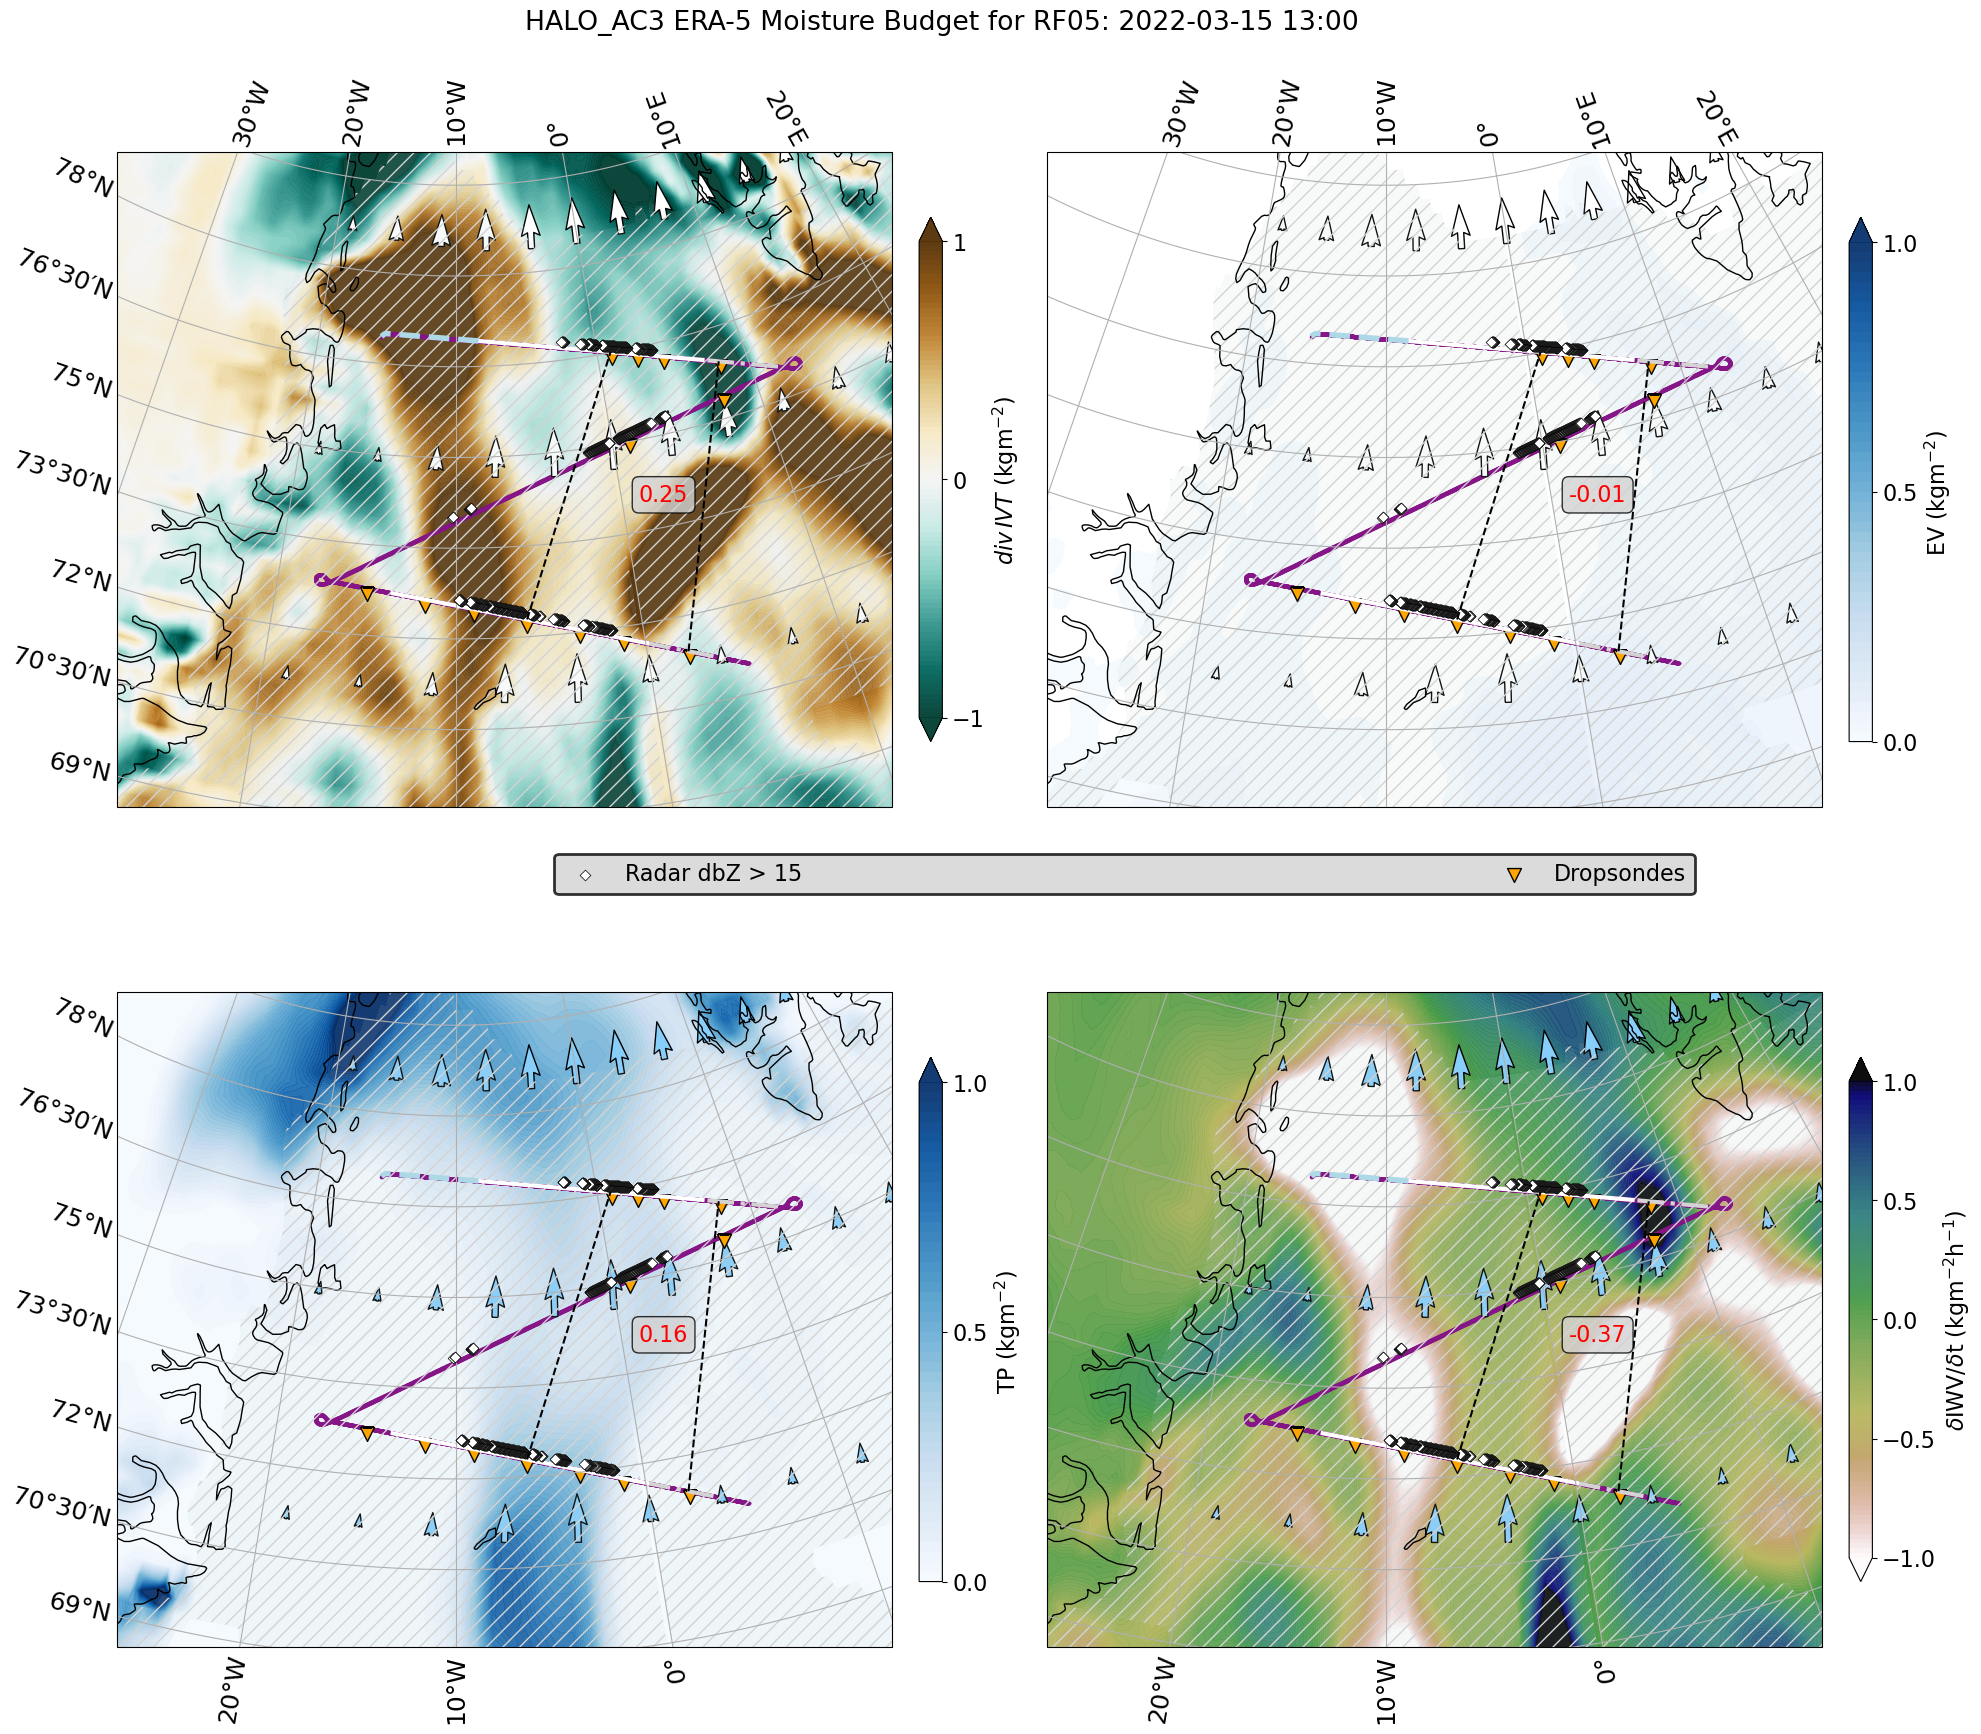

In [9]:
# Map the AR flight intersection
last_hour=pd.DatetimeIndex(halo_df.index).hour[-1]#
Flightmap.halo_dict={flight[0]:halo_df}

Flightmap.plot_AR_moisture_components_map(ERA5_on_HALO,radar,Dropsondes,cmpgn_cls,
                                          do_sector_based=True,only_warm_sector=True)
halo_era5.name="ERA5"

In [10]:
hmc_plotting_desired=False
if hmc_plotting_desired:
    # ERA5 
    if era_is_desired:
           halo_era5_hmc=ERA5_on_HALO.load_hwc()
       #----------------------------------------------------------------------#
       # CARRA
    if not carra_is_desired:
           pass
    else:
        CARRA_on_HALO.load_or_calc_interpolated_hmc_data()
        halo_carra_hmc=CARRA_on_HALO.carra_halo_hmc
    #
    # ICON                                                               
    if not icon_is_desired:
            pass
    else:
        #Get vertical profiles of moisture/ hydrometeors
        halo_icon_hmc=ICON_on_HALO.load_hwc(with_hydrometeors=False)
    #----------------------------------------------------------------------#    
    # Retrieval
    if flight==["RF10"]:
        if include_retrieval:
            retrieval_dict=cmpgn_cls.load_radiometer_retrieval(
                                       campaign,
                                       variables=["T","rho_v"],
                                       calculate_spec_hum=True,
                                       sonde_p=Upsampled_Dropsondes["Pres"])
            retrieval_dict=cmpgn_cls.vertical_integral_retrieval(
                                        retrieval_dict,Upsampled_Dropsondes)
                

    """
        Plotting of datasets from HALO_ERA_Plotting class   
    """
    levels=np.linspace(0,50,50)
